In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
plt.rcParams[ "figure.figsize" ] = (10,10)

In [4]:
# Init data.
scale = 10
ndata = int(scale*2)
bounds = [-scale/2,scale/2]
nvar = int(scale/2)
xs = np.linspace(*bounds,ndata)
ys = np.random.ranf(ndata)*3
# Init data.

In [5]:
xs

array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
       -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
        0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
        2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ])

In [6]:
ys

array([2.66723518, 1.74965429, 1.59191251, 0.43729617, 0.29827189,
       0.22773264, 2.94805837, 2.28378752, 2.15320164, 1.42600327,
       1.4127106 , 2.81447315, 0.29411441, 2.49252513, 1.23383692,
       1.3081184 , 1.18085441, 0.43549825, 1.70907611, 2.7517106 ])

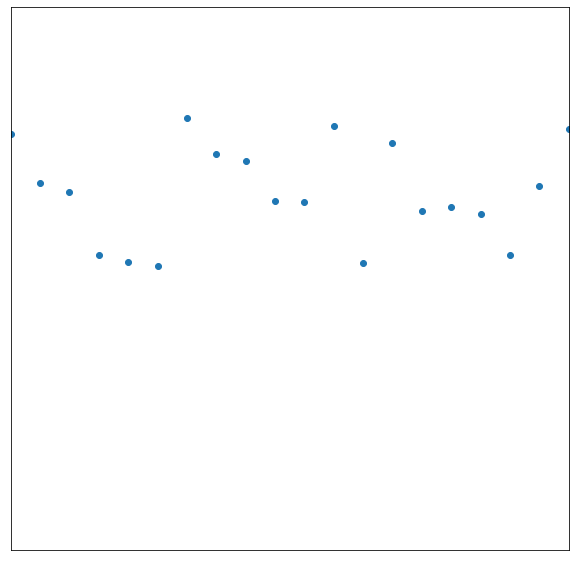

In [7]:
plt.scatter(xs,ys)
plt.axis([-scale/2,scale/2,-scale/2,scale/2])
plt.gca().axes.get_xaxis().set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)

1. what is linear regression?
1. what is mean squared error?
1. what is ordinary least squares?

# $y=mx+b$
## $m = \frac{\Sigma (x-\bar{x})(y-\bar{y})}{\Sigma (x-\bar{x})^{2}}$
## $b = \bar{y} - m\bar{x}$

*bar notation $\rightarrow$ mean

In [8]:
np.mean(xs),np.mean(ys)

(-1.7763568394002506e-16, 1.5708035736723553)

In [9]:
sum([(y - np.mean(ys))**2 for y in ys])

15.796344928211363

In [10]:
[i for i in list(zip(xs,ys))]

[(-5.0, 2.667235183461533),
 (-4.473684210526316, 1.749654291535454),
 (-3.947368421052632, 1.5919125132778849),
 (-3.4210526315789473, 0.43729616664407844),
 (-2.8947368421052633, 0.2982718924795743),
 (-2.368421052631579, 0.2277326356800573),
 (-1.8421052631578947, 2.9480583716480937),
 (-1.3157894736842106, 2.283787515622452),
 (-0.7894736842105265, 2.1532016418922755),
 (-0.2631578947368425, 1.4260032737239074),
 (0.2631578947368416, 1.412710602305202),
 (0.7894736842105257, 2.8144731464456374),
 (1.3157894736842106, 0.2941144136826297),
 (1.8421052631578947, 2.492525134321337),
 (2.3684210526315788, 1.233836922921964),
 (2.894736842105263, 1.3081183959782405),
 (3.421052631578947, 1.1808544085250452),
 (3.947368421052632, 0.4354982502637984),
 (4.473684210526315, 1.7090761089506747),
 (5.0, 2.7517106040872648)]

In [11]:
m = sum([((i[0] - np.mean(xs)) * (i[1] - np.mean(ys))) for i in list(zip(xs,ys))]) \
    / sum([(i - np.mean(xs))**2 for i in xs])
m

0.0031884584030091247

In [12]:
b = np.mean(ys) - m*np.mean(xs)
b

1.5708035736723553

In [13]:
A = np.vstack([xs, np.ones(len(xs))]).T
A[:3]

array([[-5.        ,  1.        ],
       [-4.47368421,  1.        ],
       [-3.94736842,  1.        ]])

In [14]:
numpyResults = np.linalg.lstsq(A,ys)[0]
numpyResults

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


array([0.00318846, 1.57080357])

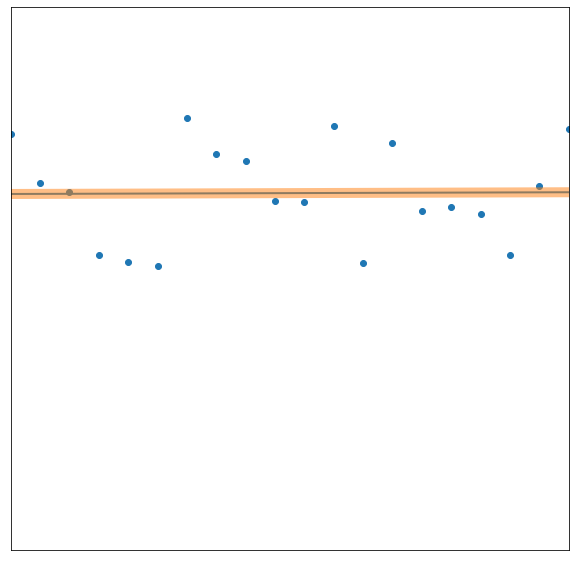

In [15]:
plt.plot(np.linspace(-scale/2,scale/2,20), m*np.linspace(-scale/2,scale/2,20)+b, lw = 2)
plt.plot(np.linspace(-scale/2,scale/2,20), numpyResults[0]*np.linspace(-scale/2,scale/2,20)+numpyResults[1], lw = 10, alpha = .5)
# don't forget to include the linspace as the x for plot
plt.scatter(xs,ys)
plt.axis([-scale/2,scale/2,-scale/2,scale/2])
plt.gca().axes.get_xaxis().set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)

In [16]:
xs

array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
       -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
        0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
        2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ])

In [17]:
ys

array([2.66723518, 1.74965429, 1.59191251, 0.43729617, 0.29827189,
       0.22773264, 2.94805837, 2.28378752, 2.15320164, 1.42600327,
       1.4127106 , 2.81447315, 0.29411441, 2.49252513, 1.23383692,
       1.3081184 , 1.18085441, 0.43549825, 1.70907611, 2.7517106 ])

In [18]:
np.mean([(i-np.mean(ys))**2 for i in ys])

0.7898172464105682

In [19]:
np.square(np.subtract(ys, np.mean(ys))).mean()

0.7898172464105682

## this method does not exactly scale to larger datasets. It becomes impossibly expensive to calculate an analytical solution like this for multi-dimensional data such as image datasets. Instead, we iterate toward what might be the best solution -- this method of iteration comes in many shapes and forms, one being gradient descent. 

## With this iterative process comes a few factors to note. One: we pass over the same data multiple times, these are 'training epochs'.

## We can also control how much of a jump in our coefficients our iterative steps should make, whatever is used in controlling these jumps are one of several potential "hyperparameters", parameters used to find the model paramters, maybe more accurately called metaparameters.

## Whatever is used to guide the selection of hyperparamters, is considered the validation set.

# perceptron

In [35]:
N = 100
xn = np.random.rand(N,2)

x = np.linspace(0,1);

In [36]:
xn[:5]

array([[0.17987139, 0.17789766],
       [0.67289956, 0.48947115],
       [0.84709976, 0.62846555],
       [0.82029247, 0.81539999],
       [0.57053908, 0.9419947 ]])

In [37]:
a = np.random.rand();
b = np.random.rand();
f = lambda x : a*x + b;

In [38]:
yn = np.zeros([N,1]);

for i in range(N):
    if(f(xn[i,0])>xn[i,1]):
        # Point is below line
        yn[i] = 1;
#         pl.plot(xn[i,0],xn[i,1],'go')
    else:
        # Point is above line
        yn[i] = -1;

In [39]:
yn[:10]

array([[ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [-1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.]])

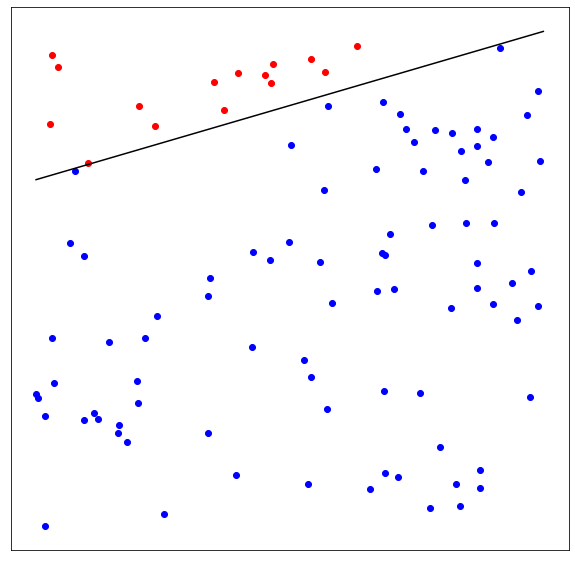

In [40]:
for ind,i in enumerate(yn):
    if i == 1:
        plt.plot(xn[ind,0],xn[ind,1],'bo')
    if i == -1:
        plt.plot(xn[ind,0],xn[ind,1],'ro')
plt.plot(x,f(x),'k')
plt.gca().axes.get_xaxis().set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)

perceptron equation
# $y = w_0 + \Sigma^{n}_{i=1}x_iw_i$

In [50]:
f = lambda x: np.sign(w[0]+w[1]*x[0]+w[2]*x[1])

In [51]:
w = np.zeros(3)
w

array([0., 0., 0.])

In [52]:
N = np.shape(xn)[0]
N

100

In [53]:
xn[:10]

array([[0.17987139, 0.17789766],
       [0.67289956, 0.48947115],
       [0.84709976, 0.62846555],
       [0.82029247, 0.81539999],
       [0.57053908, 0.9419947 ],
       [0.8693182 , 0.82402505],
       [0.975162  , 0.53032085],
       [0.00379831, 0.26833793],
       [0.78566775, 0.82199558],
       [0.86891567, 0.54699791]])

In [54]:
yn[:10]

array([[ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [-1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.]])

```python
f = lambda x: np.sign(w[0]+w[1]*x[0]+w[2]*x[1])
```

In [55]:
iters = 500
wHist = []
for _ in range(iters): # take 250 random observations of the data, one at a time.
    i = np.random.randint(N) 
    # select 1 graphed dot randomly
    if(yn[i] != f(xn[i,:])): 
        # If the label for that dot does not match the classification,
        # adjust the line to account for that point.
        w[0] += yn[i] # Use the label to inform the direction that the line points (up or down)
        w[1] += yn[i]*xn[i,0] # Use the label and the point to change the orientation of the line
        w[2] += yn[i]*xn[i,1]
        
        '''
        b_perceptron = -w[0]/w[2];
        m_perceptron = -w[1]/w[2];
        '''
        print('classification incorrect', i, _)

classification incorrect 94 0
classification incorrect 4 1
classification incorrect 72 2
classification incorrect 83 4
classification incorrect 37 5
classification incorrect 61 9
classification incorrect 85 14
classification incorrect 82 57
classification incorrect 5 58
classification incorrect 88 66
classification incorrect 59 68
classification incorrect 34 75
classification incorrect 12 76
classification incorrect 39 86
classification incorrect 15 87
classification incorrect 46 89
classification incorrect 38 90
classification incorrect 86 118
classification incorrect 39 132
classification incorrect 83 144
classification incorrect 21 146
classification incorrect 4 161
classification incorrect 68 163
classification incorrect 30 188
classification incorrect 39 190
classification incorrect 12 196
classification incorrect 46 207
classification incorrect 20 220
classification incorrect 79 225
classification incorrect 86 234
classification incorrect 4 237
classification incorrect 68 241
cla

In [56]:
w

array([ 2.        ,  3.57435618, -5.32417038])

In [57]:
b_perc = -w[0]/w[2];
m_perc = -w[1]/w[2];
y = lambda x: m_perc * x + b_perc;
f = lambda x : a*x + b;

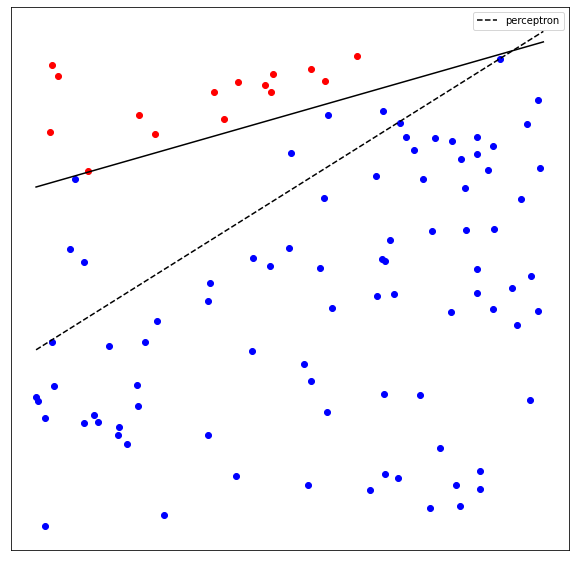

In [58]:
for ind,i in enumerate(yn):
    if i == 1:
        plt.plot(xn[ind,0],xn[ind,1],'bo')
    if i == -1:
        plt.plot(xn[ind,0],xn[ind,1],'ro')
plt.plot(x,f(x),'k')

plt.plot(x,y(x),'k--',label='perceptron')
plt.legend()

plt.gca().axes.get_xaxis().set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)